# P02 Rozkład


In [16]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

**Wykorzystam funkcje eksponencjalną jako test statystyczny**


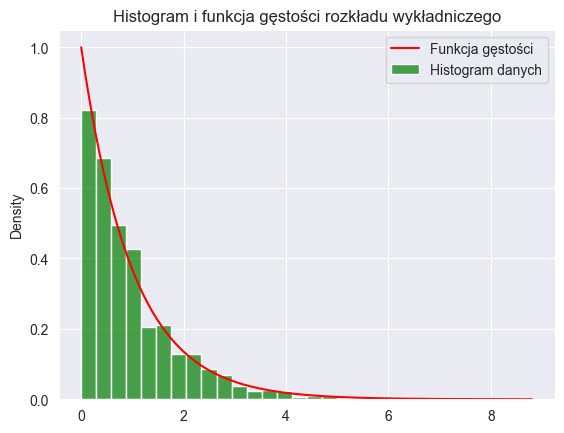

In [ ]:
lambda_param = 1
mu = 1 / lambda_param
sigma = np.sqrt(1 / lambda_param**2)


n = 1000
data = np.random.exponential(1 / lambda_param, n)


x = np.linspace(0, max(data), 1000)
pdf = lambda_param * np.exp(-lambda_param * x)
sns.histplot(
    data,
    bins=30,
    kde=False,
    stat="density",
    color="g",
    label="Histogram danych",
    alpha=0.7,
)
sns.set_style("darkgrid")
plt.plot(x, pdf, "r-", label="Funkcja gęstości")
plt.title("Histogram i funkcja gęstości rozkładu wykładniczego")
plt.legend()
plt.show()

W sumie to tak okej, napewno się zgadza wygląd rozkładu, nie mogę tego samego powiedzieć o wartości.


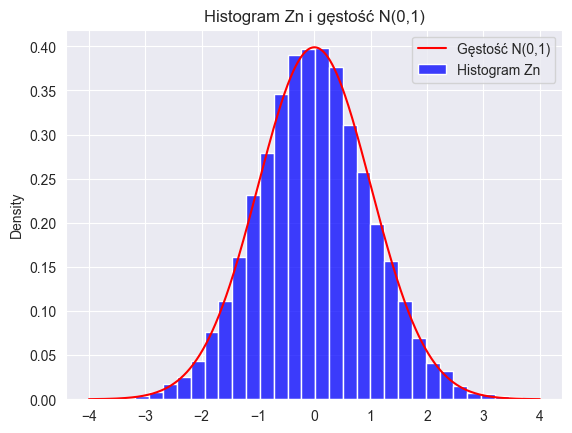

Średnia z wartości Z: -0.005939272494651562
Odchylenie standardowe Z: 1.0006680869814664


In [ ]:
s = 10000
z_values = []
for _ in range(s):
    sample = np.random.exponential(1 / lambda_param, n)
    sample_mean = np.mean(sample)
    z = np.sqrt(n) * (sample_mean - mu) / sigma
    z_values.append(z)


z_values = np.array(z_values)
x = np.linspace(-4, 4, 1000)
normal_pdf = stats.norm.pdf(x, 0, 1)
sns.histplot(
    z_values, bins=30, kde=False, stat="density", color="b", label="Histogram Zn"
)
sns.set_style("darkgrid")
plt.plot(x, normal_pdf, "r-", label="Gęstość N(0,1)")
plt.title("Histogram Zn i gęstość N(0,1)")
plt.legend()
plt.show()


print("Średnia z wartości Z:", np.mean(z_values))
print("Odchylenie standardowe Z:", np.std(z_values))